In [1]:
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [1]:
import pandas as pd
import string
import textblob
from textblob import TextBlob
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import re

pd.set_option('display.max_colwidth', 400)
df=pd.read_csv("coronavirus-tweet-id-2020-10-09-23.csv")
df.drop(['hashtags','user_location','user_description','media','urls','user_followers_count','user_created_at','user_default_profile_image','id','user_statuses_count','source','favorite_count','in_reply_to_user_id','retweet_count','coordinates','user_favourites_count','created_at','in_reply_to_screen_name','in_reply_to_status_id','possibly_sensitive','retweet_screen_name','tweet_url','user_friends_count','user_listed_count','user_name','user_time_zone','user_verified','user_screen_name.1','user_urls'],axis=1,inplace=True)
df["text"] = df["text"].str.lower()
df['text'] = df['text'].str.replace('[^\w\s#@/:%.,_-]', '', flags=re.UNICODE)
df.reset_index()
df.head(20)

C:\Users\Ammad Amir\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,lang,place,retweet_id,text,user_screen_name
0,en,NaN,NaN,@lindseygrahamsc @harrisonjaime the debate was cancelled because you refused a covid test. the debate was cancelled because you found a way out.,topshelfshannon
1,en,NaN,1.314680e+18,"rt @epsomcanine: more than ever we need to store our stuff as we can only do fundraisers online due to covid-19 restrictions, thanks #bigye",jamesdyson53
2,en,NaN,1.314680e+18,"rt @england: congratulations to @marcusrashford, who has been awarded an mbe for services to vulnerable children in the uk during covid-19",Raschid_bwhizzy
3,en,NaN,1.314690e+18,rt @ncdcgov: a breakdown of cases by state can be found via https://t.co/zqrpneofet\n\n#takeresponsibility https://t.co/owovvnzkkt,mpiredivine
4,es,NaN,1.314570e+18,rt @apapell: es irritante. es directamente mentira que la covid-19 vaya bien en madrid. estamos a la cabeza mundial de contagios,JuliaMorillo6
5,en,NaN,NaN,the data speak for themselves: dr. anthony fauci says white house held a superspreader event for coronavirus https://t.co/cdkftvdom3,SAYHERNAME_BLM
6,en,NaN,NaN,@projectlincoln home with covid,AmyBlack3560
7,en,NaN,1.314700e+18,rt @meidastouch: so lindsey graham was sitting next to mike lee recently without a mask when lee had covid symptoms now officially covid p,POOKIEWOO
8,und,NaN,1.314700e+18,rt @chrislhayes: #objectivelyprocovid https://t.co/1pwc69kris,nsunsan22
9,und,NaN,NaN,#lindseygrahamhascovid https://t.co/atufzqoyaf,SarahWh50688441


In [2]:
def cleanTweets(text):
    text = re.sub('@[A-Za-z0-9]+', '', text)  #removed @mentions
    text = re.sub('#', '', text) #removing the hash symbols
    text = re.sub('RT', '', text) #removing RT
    text = re.sub('https?:\/\/\S+', '', text) #remove the hyper links
    return text
df['text'] = df['text'].apply(cleanTweets)

In [3]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [4]:
def remove_pun(text):
    txt_nopunt ="".join([c for c in text if c not in string.punctuation])
    return txt_nopunt
df['text'] = df['text'].apply(remove_pun)

In [5]:
nan_value = float("NaN")
df.replace("", nan_value, inplace=True)
df.dropna(subset = ["place"], inplace=True)
df = df[df['retweet_id'].isnull()]
df.drop(df.index[(df["lang"] != "en")], axis = 0, inplace = True)
df = df.replace(r'\n\n',' ', regex=True) 
df = df.replace(r'\n',' ', regex=True) 

In [6]:
rows = df.shape[0] 
print("Rows: " + str(rows)) 

Rows: 713


In [7]:
df['text'] = df['text'].astype('str') 
df['polarity'] = df.apply(lambda x: TextBlob(x['text']).sentiment.polarity, axis=1)
df['subjectivity'] = df.apply(lambda x: TextBlob(x['text']).sentiment.subjectivity, axis=1)
df.drop(df.index[(df["subjectivity"] >= 0.5)], axis = 0, inplace = True)
df = df.reset_index()
df.head(50)

,index,lang,place,retweet_id,text,user_screen_name,polarity,subjectivity
0,111,en,"Elkridge, MD",NaN,class,fnkelly3,0.000000,0.000000
1,114,en,"Hercules, CA",NaN,like covid,Sabeenahmad1,0.000000,0.000000
2,206,en,"Pennsylvania, USA",NaN,gop in pennsylvania house of reps conceals covid status from the democrats while exposing everyone to it,samsid,0.000000,0.000000
3,925,en,"Fern Creek, KY",NaN,this tyrant governor the boss will stop at nothing to run businesses out of kentucky pitiful,clyde_weber,0.000000,0.000000
4,1654,en,"Trowbridge Park, MI",NaN,lindseygrahamhascovid leningradlindsey bringing covid to a town near you soon,PoeDameron31,0.100000,0.400000
5,2682,en,"Pine Ridge, FL",NaN,they should have let biden have the 90 minutes to answer questions from voters,SharonS365,0.000000,0.000000
6,4135,en,"Robertsdale, AL",NaN,praying for you your family chriss and his family and for your state this country no longer needs to fear covid19 as much as we have to fear that monster in our white house,BarbaraCallah11,0.100000,0.100000
7,4295,en,"Georgia, USA",NaN,and another but why would lindsey not want to take a covid19 test,captainkudzu,0.000000,0.000000
8,4371,en,"New York, USA",NaN,mmm sounding like someone is not feeling not so well i wouldnt go in a building with him either if he is refusing not to take the test it was agreed upon from the start then he tries to turn on harris he will to take the test gram is not,Jennife51899150,-0.100000,0.400000
9,4514,en,"Winterset, IA",NaN,interesting thanks for sharing some thoughts its so true that schools in general are stuck in some noninnovative ruts the climate is not there for reinventing i hoped one silver lining of covid would have been for schools to really break some molds,AlanFeirer,0.260000,0.410000


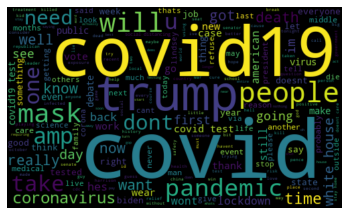

In [8]:
#plot the word cloud
all_words = ' '.join( twts for twts in df['text'] )
wordCloud = WordCloud(width = 500, height = 300, random_state = 21, max_font_size = 120).generate(all_words)
plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

In [9]:
#create a function to compute negative, neutral and positive analysis
def get_analysis(score):
    if score < 0:
        return 'Negative'
    if score == 0:
        return 'Neutral'
    else:
        return 'Positive'
df['Analysis'] = df['polarity'].apply(get_analysis)
df.head(60)

,index,lang,place,retweet_id,text,user_screen_name,polarity,subjectivity,Analysis
0,111,en,"Elkridge, MD",NaN,class,fnkelly3,0.000000,0.000000,Neutral
1,114,en,"Hercules, CA",NaN,like covid,Sabeenahmad1,0.000000,0.000000,Neutral
2,206,en,"Pennsylvania, USA",NaN,gop in pennsylvania house of reps conceals covid status from the democrats while exposing everyone to it,samsid,0.000000,0.000000,Neutral
3,925,en,"Fern Creek, KY",NaN,this tyrant governor the boss will stop at nothing to run businesses out of kentucky pitiful,clyde_weber,0.000000,0.000000,Neutral
4,1654,en,"Trowbridge Park, MI",NaN,lindseygrahamhascovid leningradlindsey bringing covid to a town near you soon,PoeDameron31,0.100000,0.400000,Positive
5,2682,en,"Pine Ridge, FL",NaN,they should have let biden have the 90 minutes to answer questions from voters,SharonS365,0.000000,0.000000,Neutral
6,4135,en,"Robertsdale, AL",NaN,praying for you your family chriss and his family and for your state this country no longer needs to fear covid19 as much as we have to fear that monster in our white house,BarbaraCallah11,0.100000,0.100000,Positive
7,4295,en,"Georgia, USA",NaN,and another but why would lindsey not want to take a covid19 test,captainkudzu,0.000000,0.000000,Neutral
8,4371,en,"New York, USA",NaN,mmm sounding like someone is not feeling not so well i wouldnt go in a building with him either if he is refusing not to take the test it was agreed upon from the start then he tries to turn on harris he will to take the test gram is not,Jennife51899150,-0.100000,0.400000,Negative
9,4514,en,"Winterset, IA",NaN,interesting thanks for sharing some thoughts its so true that schools in general are stuck in some noninnovative ruts the climate is not there for reinventing i hoped one silver lining of covid would have been for schools to really break some molds,AlanFeirer,0.260000,0.410000,Positive


In [10]:
#print all the positive tweets
j = 1
sorted_DF = df.sort_values(by = ['polarity'])
for i in range (0, sorted_DF.shape[0]):
        print(str(j) + ')' + sorted_DF['text'][i])
        print()
        j = j + 1

1)class 

2) like covid

3) gop in pennsylvania house of reps conceals covid status from the democrats while exposing everyone to it

4)this tyrant governor the boss will stop at nothing to run businesses out of kentucky pitiful 

5)lindseygrahamhascovid  leningradlindsey bringing covid to a town near you soon 

6)they should have let biden have the 90 minutes to answer questions from voters 

7)   praying for you your family chriss and his family and for your state this country no longer needs to fear covid19 as much as we have to fear that monster in our white house

8)and another  but why would lindsey not want to take a covid19 test   

9) mmm sounding like someone is not feeling not so well i wouldnt go in a building with him either if he is refusing not to take the test it was agreed upon from the start then he tries to turn on harris he will to take the test gram is not 

10) interesting thanks for sharing some thoughts its so true that schools in general are stuck in some nonin

In [11]:
#print all the negative tweets
j = 1
sorted_DF = df.sort_values(by = ['polarity'], ascending = 'False')
for i in range (0, sorted_DF.shape[0]):
    if(sorted_DF['Analysis'][i] == 'Negative'):
        print(str(j) + ')' + sorted_DF['text'][i])
        print()
        j = j + 1

1) mmm sounding like someone is not feeling not so well i wouldnt go in a building with him either if he is refusing not to take the test it was agreed upon from the start then he tries to turn on harris he will to take the test gram is not 

2)   no social distancing i mean we still in middle of a global pandemic

3)what exactly does associated with mean in epidemiology 

4) i cat whisper  but no sound i use tuna  her favourite food shes not interested  how damn deep  i dont know builders in poland  fuck you covid you killed everyone  even my cat  if she survives  ill sleep tonight  god heal me  my best friend  stuck down there  a rotten hole

5) he needs forced to take one now before he gives covid to the entire senate

6) i voted hell no for a few reasons first what has changed in our ability to control the spread of covid19 it was announced yesterday that 32 of 50 states are at their highest growing rates how can we trust anyone to not send their kids if ill based on history 3polit

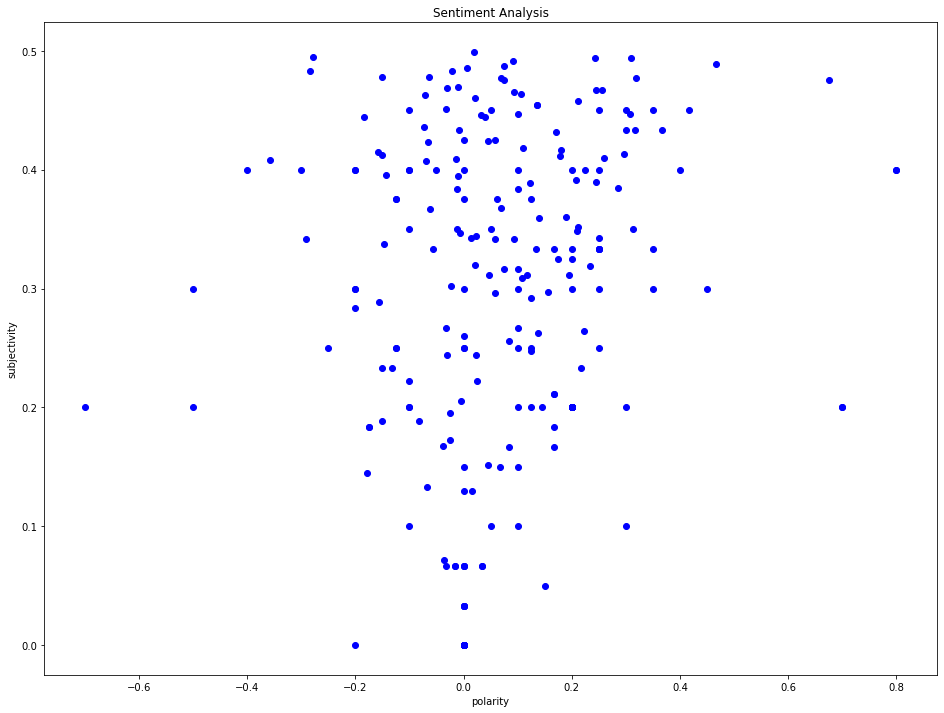

In [12]:
#plot polarity and subjectivity
plt.figure(figsize=(16, 12))
for i in range(0, df.shape[0]):
    plt.scatter(df['polarity'][i], df['subjectivity'][i], color = 'Blue')
    
plt.title('Sentiment Analysis')
plt.xlabel('polarity')
plt.ylabel('subjectivity')
plt.show()

In [13]:
df['Analysis'].value_counts()


Neutral     250
Positive    132
Negative     72
Name: Analysis, dtype: int64

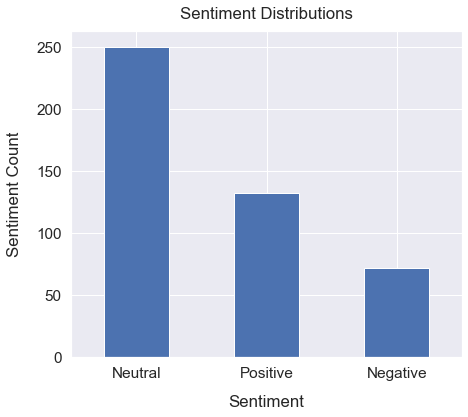

In [32]:
import seaborn as sns
sns.set(font_scale=1.4)
df['Analysis'].value_counts().plot(kind='bar', figsize=(7, 6), rot=0)
plt.xlabel("Sentiment", labelpad=14)
plt.ylabel("Sentiment Count", labelpad=14)
plt.title("Sentiment Distributions", y=1.02);

In [34]:
text = "my covid report came positive"
x = TextBlob(text)
x.sentiment

Sentiment(polarity=0.22727272727272727, subjectivity=0.5454545454545454)